In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker
import re

In [2]:
import tools

In [3]:
data = pd.read_json("data/flink/commits_20220602-16h05m47s_apache_flink_master_commits.txt", lines=True)
data = data.sort_values(by='authoredDate')
tools.initialize_datetime(data)

In [4]:
competitors = ['spark', 'beam', 'kafka']
datasets = []
for competitor in competitors:
    dataset = pd.read_json(f"data/{competitor}_commits.txt", lines=True)
    tools.initialize_datetime(dataset)
    datasets.append(dataset)

## Additions & Deletions

What are the number of lines of code added/deleted every month? Can we learn something about the activity in the project?

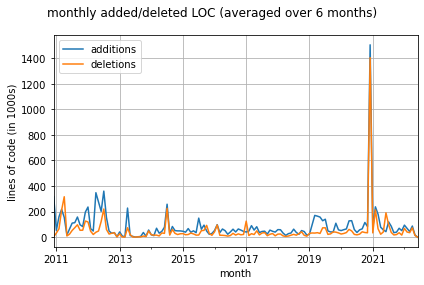

In [13]:
f, ax = plt.subplots()
monthly_loc = data.set_index('authoredDate')[['additions', 'deletions']].resample('M').sum().mean()
monthly_loc /= 1000
monthly_loc.plot(ax=ax)
ax.grid()
ax.set(ylabel='lines of code (in 1000s)', xlabel='month')
f.suptitle('monthly added/deleted LOC')
tools.savefig(f, "commits_additions_deletions")

In [18]:
print(monthly_loc.idxmax(), monthly_loc.max())

additions   2020-12-31 00:00:00+00:00
deletions   2020-12-31 00:00:00+00:00
dtype: datetime64[ns, UTC] additions    1505.024
deletions    1404.677
dtype: float64


We see a high number of lines of code added to the project at the start, which is to be expected. There is increased activity (especially additions) after 2019 which is less easily explained. 

However, with more context information it is difficult to really understand what meaningful changes took place. An example is the spike of activity in December 2021. This may be the fruition of a big development effort, more likely it is the effect of code being moved without any meaningful changes.  

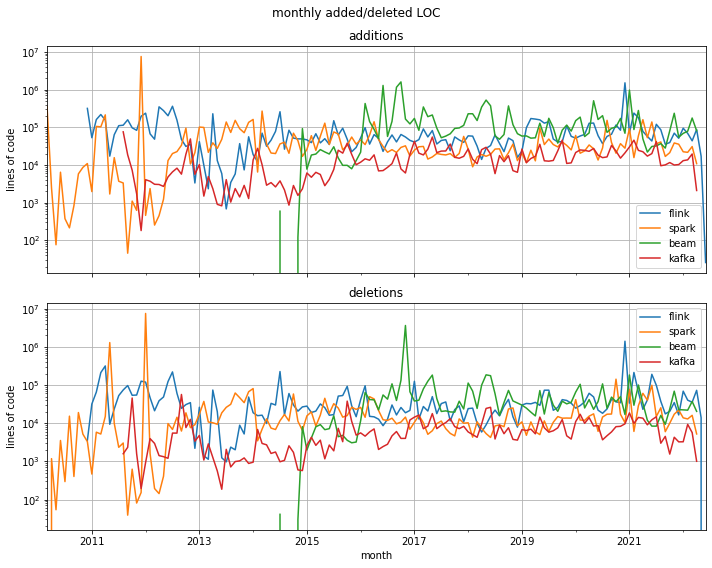

In [23]:
def added_over_time(dataset: pd.DataFrame):
    return dataset.set_index('authoredDate')['additions'].resample('M').sum().rolling(1).mean()

def deleted_over_time(dataset: pd.DataFrame):
    return dataset.set_index('authoredDate')['deletions'].resample('M').sum().rolling(1).mean()

def plot_added_over_time(ax):    
    ax.set_title('additions')
    added_over_time(data).plot(ax=ax, label='flink')
    for competitor, dataset in zip(competitors, datasets):
        added_over_time(dataset).plot(ax=ax, label=competitor)

def plot_deleted_over_time(ax):    
    ax.set_title('deletions')
    deleted_over_time(data).plot(ax=ax, label='flink')
    for competitor, dataset in zip(competitors, datasets):
        deleted_over_time(dataset).plot(ax=ax, label=competitor)

f, axes = plt.subplots(nrows=2, sharex=True, figsize=(10, 8))
plot_added_over_time(axes[0])
plot_deleted_over_time(axes[1])

for ax in axes:
    ax.legend()
    ax.grid()
    ax.set_yscale('log')
    ax.set(xlabel='month', ylabel='lines of code')
    
f.suptitle('monthly added/deleted LOC')
tools.savefig(f, "commits_additions_deletions_comparisons")

Can we learn something from contrasting additions and deletions of different projects?

I think this is less meaningful than looking at the number of commits.